Group Name: AG 03.

Student Name (Student ID):

1. xxxx xxxxx (xxxxxxx)

2. xxxx xxxxx (xxxxxxx)

3. xxxx xxxxx (xxxxxxx)

# Question 2

## Introduction to question 2

In the second question of this assignment, we will explore the use of local search in genome assembly.

We will use local search to assemble (construct) a large part of the nucleotide sequence of the monkeypox virus, which has been downloaded from the National Center for Biotechnology Information in the United States. Please note that no additional or specialized knowledge of biology or bioinformatics is required for this assignment. (Actually, the technical specifics of bioinformatics have been adapted and simplified for the purposes of this computer science assignment, so if you are a biologist, please do not apply preexisting knowledge to solve the problem. Furthermore, you should not attempt to search up the genome on genomic databases to "guess" the actual sequence, since we are more interested in your coding methodology rather than your attempts at reproducing a known sequence.)

This is an introductory computer science assignment and not a bioinformatics assignment; we are simply using bioinformatics as a use case to illustrate the applicability of local search to the natural sciences. Therefore, no knowledge of bioinformatics is assumed or required. In the paragraphs that follow, I will give a short crash course which will cover all the domain knowledge you will need to know in order to tackle this problem.  

For technical reasons, when we analyze the nucleotide sequence (genome) of a virus, we usually cannot “read” it in one fell swoop. We have to read the genome in parts, because the genome is usually too long for the machine to read in a single sitting. To simplify things, a “read” is a single view of part of the genome; think of it as a SUBSTRING, a partial view of the whole genome. After we have generated multiple reads of a genome, we then have to “stitch”, or combine, the different reads of the genome together. This process of stitching up reads of a genome into the final sequence is known as genome assembly. However, the different reads of the genome cannot just be concatenated like usual string concatenation. It’s not a situation where you have one read, “Hello”, and another read, “World”, and all you need to do is concatenate both strings together to make “Hello World”. Among other reasons, there are two major reasons why you can’t do so:

1. You do not know which read came first. The reads are not ordered. How do you know “Hello” came after “World”? The answer is that you don’t. Imagine how complicated this situation might be if you had more than two reads. (This is indeed our situation, where we have $n$ reads, and $n>>2$.)

2. One read may contain a substring contained in another read. Specifically, without loss of generality, part of the ending $x$ characters of a read (i.e., suffix) might also be found in the starting $x$ positions (i.e., prefix) of another read.

- A computer scientist usually creates opportunities from problems. While this may be a “problem” in that you just can’t concatenate two strings blindly, the fact that strings contain shared “substrings” is actually a very helpful clue that you can use to “join” strings together. 

- Note that the choice of the value of $x$ could be a hyperparameter decided by the computer scientist.

## Your tasks

In this part of the assignment, you will work with (simulated) reads that I have generated from the nucleotide sequence of the monkeypox virus. In reality, bioinformatics is far more complicated, but here we will work with a simplified situation. Your task is to examine the reads that I have provided for you, and from there “infer” the nucleotide sequence that might have produced those reads. 

The reads are provided in the csv file `data.csv` which simply provides a list of unique strings. Note that you should NOT assume any particular ordering of the strings in this dataframe. In fact, the strings have already been shuffled randomly. 

NOTE: You are not allowed to use `pandas` or any other libraries apart from the Python STL to load the csv file.

### Task A (3 marks): 

Create a directed graph. The nodes in the graph are the strings in the list of reads. An edge should be drawn FROM read A TO read B if and only if a suffix (of length $x$) of read A is also a prefix (obviously, also of length $x$) of read B. For the purposes of the assignment, limit the value of $x$ to between 5 and 30, both inclusive. That is, to be clear, $5\leq x\leq 30$. The weight of an edge between read A and read B should be the NEGATED value of $x$, i.e. $-x$. 

In your Jupyter notebook, please report the number of edges in your graph. Provide a barplot or histogram which shows the number of edges with different weights or weight categories. In this task, you are free to use plotting libraries such as `matplotlib` or `seaborn` to plot this graph.

As an example, if read A is "TACTAGT" and read B is "TAGTCCCCT", then an edge is drawn FROM read A TO read B (i.e., $A \rightarrow B$) with weight of $-4$. This is because the 4-suffix "TAGT" is also the 4-prefix of read B; in other words, the last 4 characters of read A (a substring of length 4) overlap with the first 4 characters of read B (a substring of length 4).

### Task B (7 marks): 

From Task A, you now have a graph which shows connections between reads based on how they overlap, in theory you could draw a path through the graph and thereby derive the full sequence (genome).

Task B asks you to use local search method(s) to determine a path through this directed graph of strings. 

- You are expected to use simulated annealing and tune the relevant configuration settings and hyperparameters. The minimum requirement is to implement simulated annealing.

- Explain tha rationale behind the choice of scheduling strategy and parameters.

- However, you may also explore other search methods in addition to simulated annealing. Marks will be awarded for effort.

Note the following constraints:

1. The path has to go through each and every vertex exactly once. For computer scientists, this constraint is reminiscent of the "Traveling Salesman's Problem", except that unlike TSP, we should not need to go back to the starting vertex again. 

2. For the purposes of neighbor generation / action selection at each node, bear in mind that a path through the graph which minimizes the total number of nucleotides in the assembled sequence is the preferred path. To state that another way, the assembled sequence should be derived from a path that goes through EACH and EVERY vertex exactly once, however we want this assembled sequence to be AS SHORT AS POSSIBLE.

3. You are not given the starting (source/origin) or ending (destination) vertex.

4. For avoidance of ambiguity, no cycles are allowed. You must not visit a vertex more than once.

5. You are not allowed to use any libraries apart from the Python Standard Library.
No import statements which import libraries outside of the Python STL should be found within your answer for Task B.

Please remember to report the assembled sequence that you obtain. Although it would be great if you can come up with a good sequence, please feel reassured that we are more interested in your APPROACH to the problem, and so you can potentially get a reasonable score on this task even if your solution is "wrong". It is the process, rather than the result, which matters more.

# Part 1 - Implementation of a graph structure of data.csv.

Input Data: to be structured into a dictionary using {index:read_sequence} 


### Create Graph Object

A graph object which is a dictionary of dictionaries is created.

It follows the format:

{
A: {B: overlapScore, C: overlapScpre, ... }
B: {D: overlapScore, F: overlapScpre, ... }
C: {A: overlapScore, E: overlapScpre, ... }
...
}

In [6]:
import copy
from typing import Type

class Graph:
    """
    Taken from AIME4e, search.py
    Modified to include __repr__.

    A graph connects nodes (vertices) by edges (links). Each edge can also
    have a length associated with it.
    The constructor call is something like:
        g = Graph({'A': {'B': 1, 'C': 2})
    this makes a graph with 3 nodes, A, B, and C, with an edge of length 1 from
    A to B,  and an edge of length 2 from A to C. You can also do:
        g = Graph({'A': {'B': 1, 'C': 2}, directed=False)
    This makes an undirected graph, so inverse links are also added. The graph
    stays undirected; if you add more links with g.connect('B', 'C', 3), then
    inverse link is also added. You can use g.nodes() to get a list of nodes,
    g.get('A') to get a dict of links out of A, and g.get('A', 'B') to get the
    length of the link from A to B. 'Lengths' can actually be any object at
    all, and nodes can be any hashable object."""

    def __init__(self, graph_dict=None, directed=True):
        self.graph_dict = graph_dict or {}
        self.directed = directed
        if not directed:
            self.make_undirected()

    def make_undirected(self):
        """Make a digraph into an undirected graph by adding symmetric edges."""
        for a in list(self.graph_dict.keys()):
            for (b, dist) in self.graph_dict[a].items():
                self.connect1(b, a, dist)

    def connect(self, A, B, distance=1):
        """Add a link from A and B of given distance, and also add the inverse
        link if the graph is undirected."""
        self.connect1(A, B, distance)
        if not self.directed:
            self.connect1(B, A, distance)

    def connect1(self, A, B, distance):
        """Add a link from A to B of given distance, in one direction only."""
        self.graph_dict.setdefault(A, {})[B] = distance #🔴 What is setdefault?

    def get(self, a, b=None):
        """Return a link distance or a dict of {node: distance} entries.
        .get(a,b) returns the distance or None;
        .get(a) returns a dict of {node: distance} entries, possibly {}."""
        links = self.graph_dict.setdefault(a, {})
        if b is None:
            return links
        else:
            return links.get(b)

    def nodes(self):
        """Return a list of nodes in the graph."""
        s1 = set([k for k in self.graph_dict.keys()])
        s2 = set([k2 for v in self.graph_dict.values() for k2, v2 in v.items()])
        nodes = s1.union(s2)
        return list(nodes)

    def __repr__ (self):
        print (self.graph_dict)



### Extract CSV


In [7]:
import csv
from pprint import pprint

# Import the data, discarding column 2 because its similar to column 1
data_reads = [] 
with open ('data.csv', 'r') as csv_file:
    for line in csv.reader(csv_file, delimiter=','):
        data_reads.append([line[0],line[2]])
#print (data)

data_reads = [[int(row[0]), row[1]] for row in data_reads[1:]] #discard the header row, convert types

"""
Test and Debug
"""
pprint (data_reads[:5])


[[0,
  'CTTGAATTGGTTCCTGGTATCATTAGGATCTCTGTCTCTCAACATCTGTTTAAGTTCATCGAGAACCACCTCCTCATTTTCCAGATAGTCAAACATTTTGACTGAATAGAAGTGAATGAGCTACTGTGAACTCTATACACCCGCACAACTAATGTCATTAAATATCATTTTTGAATGTATTTATACCATGTCAAAAACTTGTACAATTATTAATAAAAATAATTAGTGTTTAAATTTTACCAGTTCCAGATTTTACACCTCCGTTAACACCTCCATTAACCCCACTTTTTACACCACTGGACGATCCTCCTCCCCACATTCCACTGCCACTAGATGTATAAGTTTTAGATCCTTTATTACTACCATCATGTCCATGGATAAAGACACTCCACATGCCGCCACTACTACCCCCT'],
 [1,
  'ATCTTTAACGAACATATACCTAGATGGTTATTTACTAACAGACATTTTTTCAAGATCTATTGACAATAACTCCTATAGTTTCCACATCAACCAAGTAATGATCATCTATTGTTATATAACAATAACATAACTCTTTTCCATTTTTATCAGTATCTATATCAACGTCGTTGTAGTGAATAGTAGTCATTGATCTATTATATGAAACGGATATGTCTAGTTAATATTTTCTTTGATTTAAAGTCTATAGTCTTTACAAACATAATATCCTTATCCGACTTTATATTTCCTGTAGGGTGGCATAATTTTATTCTGCCTCCACAATCAGTGTTTCCAAATATATTACTAGACAATATTCCATATAGT'],
 [2,
  'TTGTACATGTAATGATTTAAAATGTGTAGTCATGCTTATTGATAAAGATCTAAAAATTAAAGCGGGTCCTCGGTACGTGCTTAACGCTATTAGTCCTCATGCCTATGATGTTTTTAGAAAATCTAATAACTTGAAAGAGATAATAGAAAATGCAGCTAAACAAAATCTAGACTCTATATCTATTTCTGTTAT

### Generate Directed Graph

A function called overlap is created to generate a graph.

In [8]:
import copy

def overlap(readlist: list): # takes
    """Returns a directed graph of overlap scores for a genome list

    Inputs
    - readlist: the csv in list format [id: 'genome seq']
    - graph_output: a Graph() object instance
    """
    graph_output = Graph()
    list_check = copy.deepcopy(readlist)
    #🔴 suggestions on how to reduce nesting appreciated

    while list_check:
        line_check = list_check.pop()
        for num_characters in reversed(range(5,31)):
            idx_matched = []
            suffix = line_check[1][-num_characters:]
            for idx, line_reads in enumerate(readlist):
                prefix = line_reads[1][:num_characters]
                # print (f'CheckID{line_check[0]}, ReadID: {idx}, suffix: {suffix}, prefix: {prefix}')
                if (suffix == prefix) and (idx not in idx_matched):
                    graph_output.connect(line_check[0], line_reads[0], num_characters)
                    idx_matched.append(idx)

    return graph_output

LOOKUP_GRAPH = overlap(data_reads)


"""
DEBUG AND TESTING
"""
for node in LOOKUP_GRAPH.nodes()[:10]:
    print (f'{node} : {LOOKUP_GRAPH.get(node)}')


0 : {224: 16, 302: 5}
1 : {228: 18, 344: 6, 511: 5}
2 : {223: 22}
3 : {355: 24, 548: 5}
4 : {436: 17}
5 : {185: 15, 102: 5, 156: 5}
6 : {433: 12, 22: 7, 485: 7}
7 : {231: 25}
8 : {590: 23, 256: 6}
9 : {43: 20}


## Plotting
Simple histogram to see distribution of overlap # and count

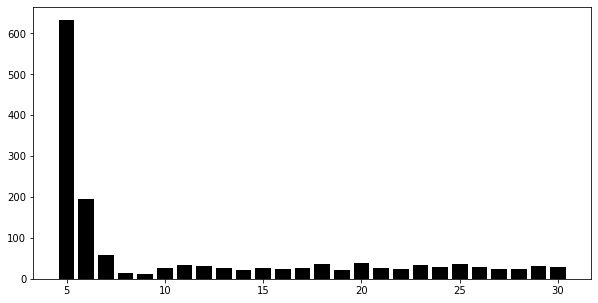

'\nDEBUGGING AND CHECK\n'

In [9]:
import matplotlib.pyplot as plt
# matplotlib.rcParams.update(_VSCode_defaultMatplotlib_Params) #force matplotlib to print white

histogram = {} #value: count

for node in LOOKUP_GRAPH.nodes():
    adjacencies = LOOKUP_GRAPH.get(node)
    for item, overlap in adjacencies.items():
        #check if present
        if histogram.get(overlap):
            histogram[overlap] += 1
        else:
            histogram[overlap] = 1

overlap_labels = list(histogram.keys())
overlap_counts = list(histogram.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(overlap_labels, overlap_counts, color = 'black')
plt.show()

"""
DEBUGGING AND CHECK
"""
# pprint (histogram)


# Part 2 - Implementation of Local Seach using Simulated Annealing

## Problem Class

In [10]:
class Problem(object):
    """The abstract class for a search problem."""

    def __init__(self, initial=None, goals=(), **additional_keywords): #🔴can be refactored to be shorter
        """Provide an initial state and optional goal states.
        A subclass can have additional keyword arguments."""
        self.initial = initial  # The initial state of the problem.
        self.goals = goals      # A collection of possible goal states.
        self.__dict__.update(**additional_keywords) ##DUNDER dict, any new initializations go here

    def actions(self, state):
        """Return a list of actions executable in this state."""
        raise NotImplementedError # Override this!

    def result(self, state, action):
        "The state that results from executing this action in this state."
        raise NotImplementedError # Override this!

    def is_goal(self, state):
        "True if the state is a goal."
        return state in self.goals # Optionally override this!

    def action_cost(self, state, action, result=None):
        "The cost of taking this action from this state."
        return 1 # Override this if actions have different costs

## TSP Subclass

In [11]:
# Code to generate neighbours, value of states, etc.
import random

class TSP(Problem):
    #Implement TSP class here
    def __int__(self, initial: list = None, lookup_graph: type[Graph] = None, swops: int = 1):
        """
        Inputs
        - swops - an integer indicating the number of pair swops
        - lookup_graph: a Graph() object instance that is related to `initial`
        - initial - a list indicating the sequence of steps through a problem
        """
        super().__init__(initial)
        self.lookup_graph = lookup_graph
        self.swops = swops

    def N_opt(self, state: list) -> list:
        '''Neighbour generating function for Traveling Salesman Problem

        Inputs
            List - the current node sequence as a list
        '''
        state2 = state[:]
        for _ in range(self.swops): #🔴 previously self.swops, but errors out in simulated anneal. To try
            l = random.randint(0, len(state2) - 1)
            r = random.randint(0, len(state2) - 1)
            if l > r:
                l, r = r,l
            state2[l : r + 1] = reversed(state2[l : r + 1])
        return state2

    def actions (self, state: list) -> list:
        """Returns a list of STATES that can follow from present state
        """
        return [self.N_opt]

    def result(self, state: list, action: list) -> list:
        """ Returns a list with new sequence through a graph
        """
        return action(state)

    def path_cost(self, state: list) -> int:
        '''Returns total overlapping score. In general, higher = better
        e.g. score 100 indicates a total of 100 characters have been overlapped.

        Inputs
            path_list - list of steps taken through graph
            lookup - overlap lookup graph of genome fragments
        '''
        res = 0
        for i in range(len(state) -1):
            n = state[i]
            n1 = state[i+1]
            score_word = self.lookup_graph.get(n, n1)
            if score_word is not None:
                res += score_word
        return res

    def value(self, state: list) -> int:
        """ Returns negative value of the path cost"""
        return -1 * self.path_cost(state)


"""
Debug and Testing
"""

tsp_problem = TSP(LOOKUP_GRAPH.nodes(), lookup_graph = LOOKUP_GRAPH, swops=500)

# print (test.initial)
# print (test.lookup_graph)
print (tsp_problem.path_cost(tsp_problem.initial))
print (tsp_problem.N_opt(tsp_problem.initial))



43
[0, 72, 47, 465, 466, 467, 522, 275, 94, 279, 426, 368, 339, 262, 173, 217, 408, 258, 257, 420, 67, 175, 369, 506, 545, 583, 41, 40, 325, 324, 540, 281, 282, 256, 157, 114, 504, 479, 390, 348, 109, 513, 143, 406, 563, 564, 16, 464, 243, 577, 476, 280, 414, 320, 523, 541, 553, 413, 354, 355, 321, 343, 501, 502, 539, 134, 309, 437, 335, 312, 469, 336, 337, 403, 448, 305, 478, 304, 52, 382, 113, 186, 487, 333, 494, 318, 75, 296, 590, 598, 597, 596, 244, 376, 375, 456, 591, 22, 23, 474, 386, 385, 557, 419, 322, 455, 77, 78, 579, 580, 581, 582, 37, 536, 11, 102, 159, 253, 543, 480, 481, 240, 239, 54, 457, 516, 215, 497, 530, 529, 226, 477, 411, 595, 459, 105, 29, 311, 418, 417, 230, 302, 303, 331, 306, 199, 551, 117, 352, 103, 104, 255, 229, 263, 46, 95, 276, 393, 30, 66, 425, 219, 220, 299, 216, 498, 542, 517, 187, 206, 205, 204, 26, 53, 423, 264, 139, 138, 416, 137, 136, 440, 439, 438, 222, 92, 91, 90, 208, 548, 571, 213, 288, 13, 190, 191, 31, 552, 28, 310, 511, 370, 228, 284, 447, 57

## Node Class

In [12]:
# Use the following Node class to generate search tree
import math
class Node:
    """A node in a search tree. Contains a pointer to the parent (the node
    that this is a successor of) and to the actual state for this node. Note
    that if a state is arrived at by two paths, then there are two nodes with
    the same state. Also includes the action that got us to this state, and
    the total path_cost (also known as g) to reach the node. Other functions
    may add an f and h value; see best_first_graph_search and astar_search for
    an explanation of how the f and h values are handled. You will not need to
    subclass this class."""

    def __init__(self, state, parent=None, action=None, path_cost=0):
        """Create a search tree Node, derived from a parent by an action."""
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost
        self.depth = 0
        if parent:
            self.depth = parent.depth + 1

    def __repr__(self):
        return "<Node {}>".format(self.state)

    def __lt__(self, node):
        return self.state < node.state

    def expand(self, problem):
        """List the nodes reachable in one step from this node."""
        return [self.child_node(problem, action)
                for action in problem.actions(self.state)]

    def child_node(self, problem, action):
        """[Figure 3.10]"""
        next_state = problem.result(self.state, action)
        next_node = Node(next_state, self, action, problem.path_cost(self.state)) #🔴 potential to log all the temperature, etc here
        return next_node

    def solution(self):
        """Return the sequence of actions to go from the root to this node."""
        return [node.action for node in self.path()[1:]]

    def path(self):
        """Return a list of nodes forming the path from the root to this node."""
        node, path_back = self, []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))


## Simulated Annealing Definition

Calculates total overlap score. Higher is better.

In [13]:
import random

#HELPER FUNCTIONS
def probability(prob: float) -> bool:
    """ returns a bool based on probability

    Inputs:
        prob:  should be a number between 0 - 1.0
        e.g. `prob` = 0.25 -> 25% probability of returning TRUE
    """
    return random.uniform(0.0,1.0) < prob

def scheduler(stp_max: int = 1000, power: int = 1, tmp_max: float = 100.0, tmp_min: float = 1.0) -> list:
    """ Returns a list of temperatures to be used

    Inputs:
        power : Nth power of Power-N curve
        stp_max: number of steps.
        tmp_max = max temperature. arbitrarily at 100
        tmp_min = min temperature. currently at 1.0
    """
    ''' Initialize '''
    stp_current = 1
    stp_max = stp_max + 1
    tmp_range = tmp_max - tmp_min
    tmp = []

    while stp_current < stp_max:
        '''Power-N Curve Cooling'''
        tmp_current = tmp_min + tmp_range * ((stp_max - stp_current) / stp_max) ** power

        '''update variables'''
        tmp.append(tmp_current)
        stp_current += 1
    return tmp


def simulated_annealing_full(problem, sch_steps: int = 1000, sch_power: int = 2, n_swops: int = 1):
    solution_tree_current = Node(problem.initial) #initialize the solution tree
    temp_schedule = scheduler(stp_max = sch_steps, power = sch_power)
    state_log = []
    step = 0

    #create logging # 🔴should these attributes be pushed back into the Node or Problem class?
    log = {}
    log['temp'] = []
    log['accp'] = []
    log['delt'] = []
    log['step'] = []
    log['scor'] = []
    log['prob'] = []
    log['state'] = []

    """Run simulated annealing process"""
    while temp_schedule:
        temp = temp_schedule.pop(0)

        """Generate next and evaluate"""
        solution_tree_next = random.choice(solution_tree_current.expand(problem)) #🔴 Will there always be another option? so null state not needed to be managed
        energy_current = problem.value(solution_tree_current.state)
        energy_next = problem.value(solution_tree_next.state)
        energy_delta = energy_current - energy_next #recall, this is flipped

        if energy_delta < 0:
            probablity_score = (math.e ** (energy_delta / temp))
            accept = probability(probablity_score)
        else:
            probablity_score = 1
            accept = True

        """Update for next cycle"""
        if accept:
            solution_tree_current = solution_tree_next

        """LOGGING"""
        step += 1
        state_log.append(solution_tree_current.state)
        log['temp'].append(temp)
        log['accp'].append(accept)
        log['delt'].append(energy_delta)
        log['step'].append(step)
        log['prob'].append(probablity_score)
        log['scor'].append(problem.path_cost(solution_tree_current.state))
        log['state'].append(solution_tree_current.state)

    return log

'''
Debugging & Testing
'''

#test for Probability.
count_true = 0
prob = 0.25
for i in range(100):
    count_true += probability (prob)
print (f'Input probability is {prob}. Out of 100 tries, there are {count_true} "Trues"')

#test for simulated anneal
states = simulated_annealing_full(tsp_problem)
print (type(states))
print (states.keys())
print (type(tsp_problem))

#exploring the tsp problem  output
print (tsp_problem)
print (states.keys())
print (len(states.get('state')))


Input probability is 0.25. Out of 100 tries, there are 29 "Trues"
<class 'dict'>
dict_keys(['temp', 'accp', 'delt', 'step', 'scor', 'prob', 'state'])
<class '__main__.TSP'>
dict_keys(['temp', 'accp', 'delt', 'step', 'scor', 'prob', 'state'])
1000


## Graphing

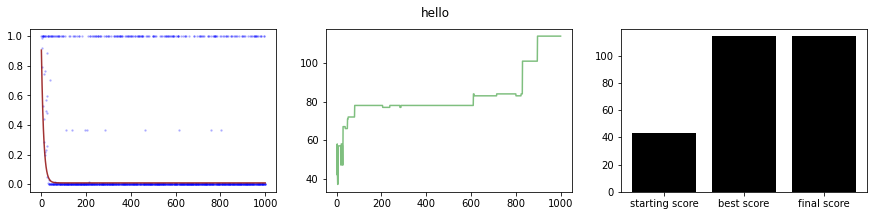

In [35]:
states = states
# Helper function to plot
def plot_results(states = states, filename = 'default'):
    ''' Plots the results of search algoritm

    Inputs:
        state = final state
        filename = filename to save as
    '''
    fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15,3))

    # Preparing the data to subplots
    x = states.get('step')
    stats = {}
    stats['starting score'] = (states.get('scor')[0]) #starting score
    stats['best score'] = max(states.get('scor')) #min score
    stats['final score'] = states.get('scor')[-1] #end score


    ax[0].plot(x, states['prob'], linestyle = 'none', marker = 'o', color = 'blue', markersize = 1.5, alpha = 0.2) #🔴 consider changing this to HEATMAP
    ax[0].plot(x, list(map(lambda temp: temp / 100, states['temp'])), color = 'darkred', alpha = 0.8)
    ax[1].plot(x, states['scor'], linestyle = 'solid', color = 'green', alpha = 0.5)
    # ax[1].scatter(x, states['scor'])
    ax[2].bar(stats.keys(), stats.values(), color = 'black')

    # Title
    plt.suptitle(f'{filename}')
    plt.savefig(str(filename))
    plt.show()

plot_results(states, 'hello')

# Exercise

## Exploring hyperparameters: Temperature Decay & Steps

For the initial exploration, we are looking at how the rate of temperature decay and step count affects 1) the final score and 2) the best score

Observations:
1. When temperature decays with power <= 1, the final score often ends up worse.

swops: 1, decay power: 0.1, steps = 100


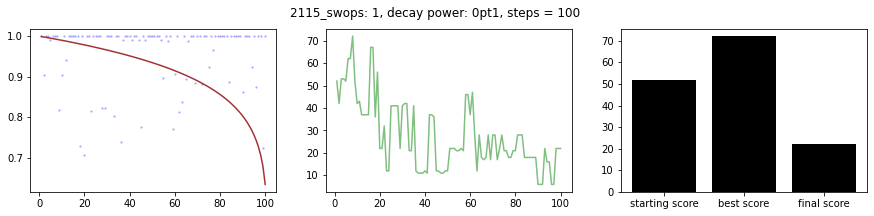

swops: 1, decay power: 1, steps = 100


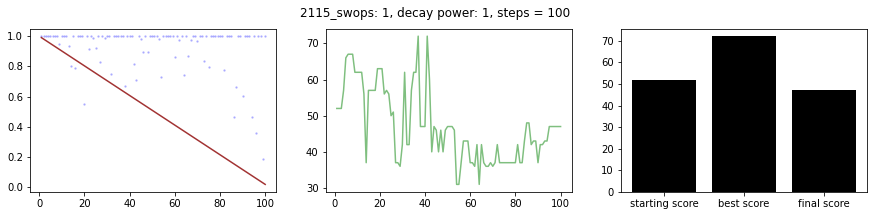

swops: 1, decay power: 10, steps = 100


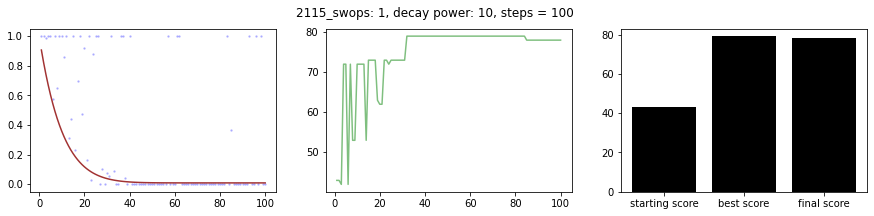

swops: 1, decay power: 100, steps = 100


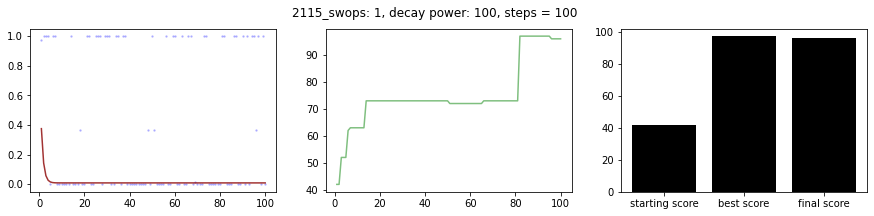

swops: 1, decay power: 0.1, steps = 1000


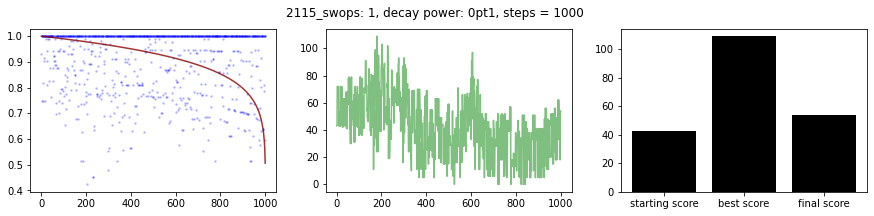

swops: 1, decay power: 1, steps = 1000


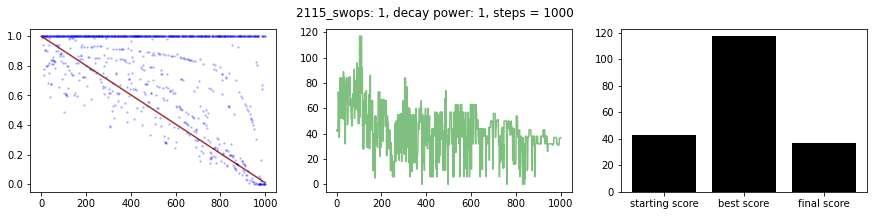

swops: 1, decay power: 10, steps = 1000


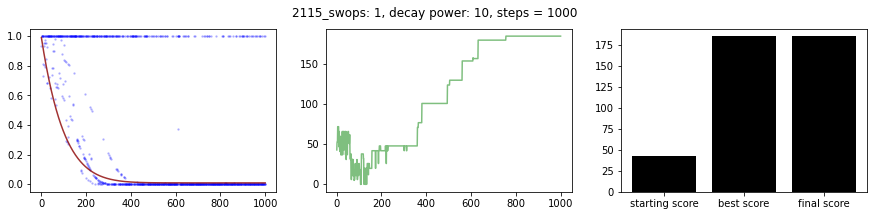

swops: 1, decay power: 100, steps = 1000


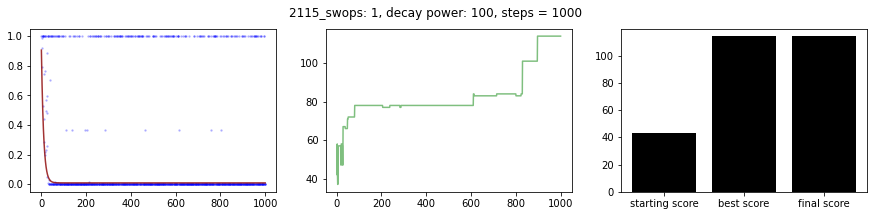

swops: 1, decay power: 0.1, steps = 10000


KeyboardInterrupt: 

In [31]:
# Test for range and decay power

"""Defining Hyperparameters to Explore"""
step_range = [100, 1000, 10000, 100000]
decay_power = [0.1, 1, 10, 100]
num_swops = [1, 10, 100, 800] # should this be a %?
state_log = {} # store data in the format: {swopX : {a: [1,2,3], b: [1,2,3...],...}, swop : ....} where swop is num_swops and a, b, c are parameters in each run

for swop in num_swops:
    # Setting up model
    tsp_problem = TSP(LOOKUP_GRAPH.nodes(), lookup_graph = LOOKUP_GRAPH, swops = swop)
    # states = simulated_annealing_full(tsp_problem)
    for steps in step_range:
        for power in decay_power:
            title = str(f'swops: {swop}, decay power: {power}, steps = {steps}', )
            print(title)
            states = simulated_annealing_full(tsp_problem, sch_steps = steps, sch_power = power)
            state_log[swop] = states
            plot_results(states = states, filename = "2115_" + title.replace(".", "pt"))


Observations
From the previous test, we learn that decay powers >2 work better. Allowing the stochastic function to be too 'loose', in the long run, results in final scores worse off than the best score.
In this test we start with a more optimized initial state by using a GBF initializer.



In [26]:
print(state_log[1].keys())

dict_keys(['temp', 'accp', 'delt', 'step', 'scor', 'prob', 'state'])


Observations 
- when score is optimized, an outlier neighbour can derail the process.

# TO CLEAN

## best First Selection

In [24]:
import random

def gbf(lookup, mode = 'min'):#🔴 needs fixing because score is now positive
    """Returns list: recording the sequence through the graph
    Concept
    Randomly choose a starting node.
    Traverse the graph based on lowest cost (i.e. greatest overlap)

    Inputs
    lg: lookup graph of overlap
    mode: 'min' or 'relaxed'
    """

    '''Initialize'''
    node_visited = []
    node_start = random.choice(lookup.nodes()) #get a random node to start

    '''Construct Trace'''
    node_current = node_start
    node_visited.append(node_current)

    # while len(node_visited) < 5:
    while len(node_visited) < len(lookup.nodes()):

        '''Get dictionary of links from current node and check if they have been traced'''
        node_children_overlapDict = lookup.get(node_current)
        node_children_untraced = list(set(node_children_overlapDict.keys()) - set(node_visited))

        '''Check if in node_visited == true, then choose another, if none then choose a random node to start again. '''
        if len(node_children_untraced):
            if mode == 'min':
                min_idx = 0
                min_overlap = 0
                for k, v in node_children_overlapDict.items():
                    if v < min_overlap and k not in node_visited:
                        min_idx = k
                        min_overlap = v
                    # print (f'current node = {node_current}, key:value = {k}, {v}, min = {min_idx}, {min_overlap}') #debug print 🐛
                node_next = min_idx
            if mode == 'relax': #🔴 NEEDS FIXING
                node_next = random.choice(node_children_untraced) #relaxed version
        else:
            node_next = random.choice(list(set(lookup.nodes()) - set(node_visited)))

        node_visited.append(node_next)
        node_current = node_next


    return node_visited



'''
#DEBUG
'''
a = gbf(LOOKUP_GRAPH)
print ('duplicate nodes: ', [item for item in a if a.count(item) > 1]) #duplicate check
print ('overlap score: ', overlap_score(a, LOOKUP_GRAPH))

duplicate nodes:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

NameError: name 'overlap_score' is not defined

In [ ]:
# Test for range and decay power
step_range = [10000, 100000]
decay_power = [10, 100]

initial = gbf(LOOKUP_genome_overlap)
for steps in step_range:
    for power in decay_power:
        title = str(f'04 decay power: {power}, steps = {steps}')
        print (title)
        states = simulated_annealing_full(initial, sch_type = 1, sch_steps = steps, sch_power = power)
        plot_results (states, title.replace(".", "pt"))
